In [1]:
import sys
sys.path.insert(0, '../util')

from layer import *
from plot import *

from __future__ import division
import random
import math
import numpy as np
import pandas as pd
import time
from numpy.linalg import norm

xy = np.mgrid[-1:1:25j, -1:1:25j].reshape(2,-1).T
p = numpy.random.permutation(len(xy))
xy = xy[p]
xyT = xy.T

sphere = np.array(list(map(lambda x: np.square(x[0]) + np.square(x[1]), xy))).reshape(1,-1)
objective_function = sphere

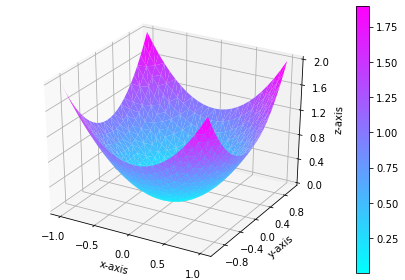

In [2]:
plot_output(xy,sphere, "sphere-original")

In [3]:
input_size = 2
computational_layer = 25
output_layer = 1
dimensions = calculate_dimensions(input_size, computational_layer, output_layer)
print(dimensions)

def position_check(new_position):
#     new_position = np.vectorize(lambda z: Wildebeest.pmax if z > Wildebeest.pmax else float(z)) (new_position)
#     new_position = np.vectorize(lambda z: Wildebeest.pmin if z < Wildebeest.pmin else float(z)) (new_position)
    return new_position


class Wildebeest:
    global dimensions
    global_best_position = np.random.random((dimensions,))
    global_best_cost, _ = forward_pass_weights_reg(global_best_position,xyT,objective_function,input_size,computational_layer,output_layer)
    pmax = 10
    pmin = -10
    
    def __init__(self, dimensions):
        self.position = np.random.random((dimensions,))
        self.cost, _ = forward_pass_weights_reg(self.position,xyT,objective_function,input_size,computational_layer,output_layer)
        self.dimensions = dimensions
        self.velocity = np.random.random((dimensions,))
        self.pmax = 10
        self.pmin = -10
        
        self.alpha_1 = 0.9 #Local movement
        self.beta_1 = 0.3  #Local movement
        self.alpha_2 = 0.2 #Global movement
        self.beta_2 = 0.8  #Global movement
        
        self.delta_w = 2 #Threshold for nearness
        self.delta_c = 2 #Threshold for avoiding crowds
        
        self.learning_rate = 0.2
        self.n_steps = 4
        self.n_e = 4


    def take_steps(self):
        steps = []

        for _ in range(self.n_steps):
            new_random_velocity = -1 + 2*np.random.random((self.dimensions,));
            new_random_position = position_check(self.position + random.random()*new_random_velocity/norm(new_random_velocity))
            new_cost, _ = forward_pass_weights_reg(new_random_position,xyT,objective_function,input_size,computational_layer,output_layer)
            steps.append([new_random_position, new_cost])

        steps = sorted(steps, key = lambda x: x[1])

        return steps
    
    def update_position(self, new_position, new_cost):
        
        self.position = position_check(self.alpha_1 * new_position + self.beta_1 * (self.position - new_position))
        self.cost, _ = forward_pass_weights_reg(self.position,xyT,objective_function,input_size,computational_layer,output_layer)
        
        if(self.cost < Wildebeest.global_best_cost):
            global_best_position = self.position
            global_best_cost = self.cost

    
    def herd_instinct(self, random_wildebeest):
    
        if(random_wildebeest.cost < self.cost and random.random() < 0.4):
            self.position = position_check(self.alpha_2 * self.position + self.beta_2 * random_wildebeest.position)
            self.cost, _ = forward_pass_weights_reg(self.position,xyT,objective_function,input_size,computational_layer,output_layer)
            if(self.cost < Wildebeest.global_best_cost):
                Wildebeest.global_best_position = self.position
                Wildebeest.global_best_cost = self.cost

    def feed_information(self, worst_position):
        
#         if(norm(self.position-worst_position) < self.delta_w):
#             new_random_velocity = -1 + 2*np.random.random((self.dimensions,));
#             self.position = position_check(self.position + random.random()*10*(self.pmax-self.pmin)*new_random_velocity/norm(new_random_velocity))
#             self.cost, _ = forward_pass_weights_reg(self.position,xyT,objective_function,input_size,computational_layer,output_layer)
            
#             if(self.cost < Wildebeest.global_best_cost):
#                 Wildebeest.global_best_position = self.position
#                 Wildebeest.global_best_cost = self.cost
                
        
        if(norm(Wildebeest.global_best_position - self.position) < self.delta_c and norm(Wildebeest.global_best_position - self.position) > 1):
            self.position = position_check(Wildebeest.global_best_position + 0.01*np.random.random((self.dimensions,)))
            self.cost, _ = forward_pass_weights_reg(self.position,xyT,objective_function,input_size,computational_layer,output_layer)
            
            if(self.cost < Wildebeest.global_best_cost):
                Wildebeest.global_best_position = self.position
                Wildebeest.global_best_cost = self.cost
        
        for _ in range(self.n_e):
            velocity = -1 + 2*np.random.random((self.dimensions,))
            position = position_check(Wildebeest.global_best_position + 0.1 * (velocity/norm(velocity)))
            cost, _ = forward_pass_weights_reg(self.position,xyT,objective_function,input_size,computational_layer,output_layer)
            
            if(cost < Wildebeest.global_best_cost):
                Wildebeest.global_best_position = position
                Wildebeest.global_best_cost = cost


101


In [4]:
n_iterations = 30
n_population = 100

agents = [Wildebeest(dimensions = dimensions) for x in range(n_population)]
temp = []
cost_list = []

In [5]:
start = time.time()
for _ in range(n_iterations):

    for agent in agents:
        steps = agent.take_steps()[0]
        agent.update_position(steps[0], steps[1])

    for agent in agents:
        h = random.randint(1,n_population)
        random_agent = agents[h-1]
        agent.herd_instinct(random_agent)

    for agent in agents:
        temp.append([agent.position,agent.cost])
    worst_position = sorted(temp, key = lambda x: x[1])[-1][0]

    for agent in agents:
        agent.feed_information(worst_position)

    cost_list.append(Wildebeest.global_best_cost)

    print(_)
end = time.time()
print(end-start)

cost, output = forward_pass_weights_reg(Wildebeest.global_best_position,xyT,objective_function,input_size, computational_layer, output_layer)
print(cost)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
71.86263084411621
471979.76553034555


In [6]:
print(reg_cost(objective_function, output))
print(mae(objective_function, output))

471979.76553034555
579.933611414616


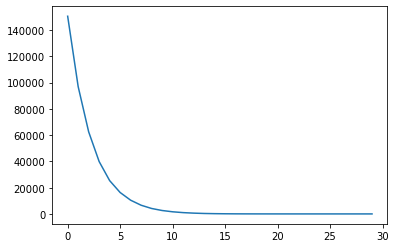

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=range(n_iterations), y = cost_list)

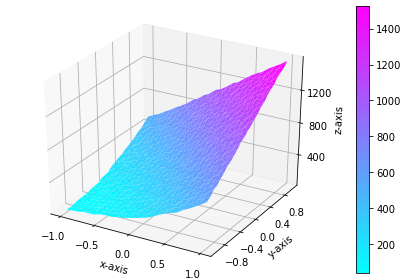

In [8]:
plot_output(xy, output, "Sphere-WHO")